# Метод Монте-Карло: расчет погрешности
Вероятно, вы уже сталкивались с концепцией распространения неопределенности(?). Идея заключается в том, что измерениях, заданных с неопределенностями, мы можем найти неопределенность конечного результата. 
Например, рассмотрим следующее уравнение:
$$F = \frac{G M_1 M_2}{r^2}$$
Оно определяет гравитационное взаимодействие между двумя телами массами $M_1$ и $M_2$, расположенными друг от друга на расстоянии r. 
Давайте предположим, что:
    $$M_1 = 40 × 10^4 ± 0.05 × 10^4 kg$$ 
    $$M_2 = 30 × 10^4 ± 0.1 × 10^4 kg$$
    $$r = 3.2 ± 0.01 m$$
Причем неопределенности определяют стандартное Гауссово отклонение, то есть отражают ошибку измерения.
Гравитационная постоянная -- константа, не имеет отклонений.
$$G = 6.67384×10^{−11} m^3 kg^{−1} s^{−2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1.1
Напишите функцию, определяющую среднее и стандартное отклонение распределения силы с помощью стандартного метода:
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas

In [2]:
def error(M1, dM1, M2, dM2, r, dr):
    ###BEGIN SOLUTION
    G = 6.67384*10**(-11)
    F = G * M1 * M2 / r**2
    sigma = F**2*((dM1/M1)**2+(dM2/M2)**2+4*(dr/r)**2)
    ###END SOLUTION
    return F, sigma

In [6]:
print(error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01))
###BEGIN HIDDEN TESTS
np.random.seed(3)

def error_answer(M1, dM1, M2, dM2, r, dr):
    G = 6.67384*10**(-11)
    F = G * M1 * M2 / r**2
    sigma = F**2*((dM1/M1)**2+(dM2/M2)**2+4*(dr/r)**2)
    return F, sigma

student  = error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
answer = error_answer(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
assert np.allclose(student, answer)
###END HIDDEN TESTS

(0.7820906249999999, 3.164520698306274e-05)


Теперь давайте попробуем получить то же распределение  помощью метода Монте Карло. Он заключается в многократной генерации случайных вводных данных и анализе полученных результатов.
В нашем случае алгоритм следующий:

    Генерируем гауссово распределение случайных величин M1, M2 и r, (10^6 точек) используя средние и стандартные отклонения, полученные из функции error.
    
    Для каждого набора данных вычисляем силу.

Совет: Не используйте циклы. Чтобы получить $10^6$ случайных точек, используйте библиотеку numpy.

# Задание 1.2 

Напишите функцию, которая определяет распределение силы методом Монте-Карло и строит нормированный график гистограммы.

In [4]:
def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6):
    ###BEGIN SOLUTION
    G = 6.67384*10**(-11)
    distM1 = np.random.normal(M1, dM1, 10**6)
    distM2 = np.random.normal(M2, dM2, 10**6)
    distr = np.random.normal(r, dr, 10**6)
    distF = G * distM1 * distM2 / distr**2
    plt.hist(distF, 100, density = True)
    plt.ylabel('p')
    plt.xlabel('F, н')
    plt.title('Задание 1')
    ###END SOLUTION

# Задание 1.3

Постройте гистограмму распределения силы, а также постройте функцию Гаусса, определяемую показателями, полученными с помощью стандартного метода. 

Совет: Убедитесь, что вы верно выбрали пределы величины x и оба графика видны. Выберите разумное количество столбиков гистограммы и сравните форму гистограммы и графика.

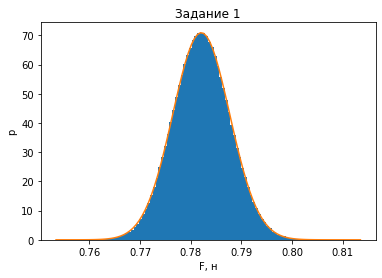

In [5]:
###BEGIN SOLUTION
MonteCarloNormal(40*10**4, 0.05*10**4, 30*10**4, 0.1*10**4, 3.2, 0.01)
G = 6.67384*10**(-11)
F = G * 40*10**4 * 30*10**4 / 3.2**2
mean, sigma = error(40*10**4, 0.05*10**4, 30*10**4, 0.1*10**4, 3.2, 0.01)
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
p = 1 / np.sqrt(2 * np.pi * sigma) * np.exp(-(mean - x)**2 / 2 / sigma)
plt.plot(x,p)
###END SOLUTION

Сделайте вывод распределении погрешности результата.

Задание 2.1
Повторите те же действия для следующих входных данных:

$$M1=40×10^4±2×10^4kg$$
$$M2=30×10^4±10×10^4kg$$
$$r=3.2±1.0 m$$

и постройте графики.

Задание 2.2

Какой метод более точный в этом случае и почему? Как вы думаете, в чем состоят преимущества метода Монте-Карло?